In [93]:
import torch
torch.manual_seed(123)

In [94]:
# Fastai is required by eb_ml_battery_lib
!pip install fastai==2.5.3 -q
# import
import pandas as pd
import numpy as np
import sys
from fastai.tabular import *
from fastai.tabular.all import *
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell
external_python_file_path='../src'
sys.path.append(external_python_file_path)


from eb_ml_colab_utils import get_root_path
from eb_ml_battery_lib import load_soc_dataset

In [95]:
#configuration dictionary
config ={}

# Root working folder (local or Google Drive)
# config['ROOT_DIR'] = get_root_path("batterie")
config['ROOT_DIR'] = get_root_path("..")  

# Folder with dataset in CSV format
#config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets"
config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets/EIS-vs-SOC-May2022"

# List of SoC level into dataset
#config['soc_list']=['100','090','080','070','060','050','040','030','020','010']
config['soc_list']=['100','090','080','070','060','050','040','030','020','010']

# Data acquisition files to load from dateset folder
battery_list=["02_4","02_5","02_6","02_7","02_8","02_9","03_4","03_5","03_6","03_7","03_8","03_9"]
dataset,feature_col_names=load_soc_dataset(battery_list,config["soc_list"],config['DATASETS_DIR'])

NOT running on COLAB


c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\.

In [96]:
dataset

,SOC,BATTERY_ID,EIS_ID,Z_f0,Z_f1,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9,Z_f10,Z_f11,Z_f12,Z_f13
100,100,02,02_4,0.110974-0.005473j,0.109770-0.003682j,0.108937-0.002976j,0.108215-0.002449j,0.106929-0.002464j,0.106234-0.003175j,0.105358-0.003646j,0.102248-0.006236j,0.098367-0.007857j,0.094470-0.008309j,0.089097-0.007805j,0.085451-0.006982j,0.082563-0.005838j,0.079681-0.004045j
090,090,02,02_4,0.107767-0.005977j,0.105732-0.004509j,0.104519-0.003129j,0.103729-0.002544j,0.102351-0.002523j,0.101694-0.002817j,0.100767-0.003266j,0.098500-0.004949j,0.095678-0.006347j,0.092417-0.007114j,0.087666-0.006955j,0.084594-0.006239j,0.081839-0.005267j,0.079271-0.003764j
080,080,02,02_4,0.107165-0.006332j,0.105013-0.004916j,0.103722-0.003520j,0.102852-0.002799j,0.101211-0.002509j,0.100603-0.002884j,0.099887-0.003352j,0.097424-0.004753j,0.094689-0.005986j,0.091708-0.006719j,0.087129-0.006657j,0.084112-0.005922j,0.081609-0.005056j,0.078829-0.003442j
070,070,02,02_4,0.106559-0.006489j,0.104313-0.005265j,0.102949-0.003590j,0.102107-0.003005j,0.100683-0.002466j,0.099931-0.002738j,0.098513-0.003302j,0.096700-0.004403j,0.094341-0.005740j,0.091369-0.006349j,0.086936-0.006386j,0.083972-0.005842j,0.081505-0.004904j,0.078872-0.003572j
060,060,02,02_4,0.106086-0.005590j,0.103528-0.005275j,0.101676-0.003395j,0.101073-0.002493j,0.099789-0.002386j,0.099039-0.002693j,0.098374-0.003033j,0.096141-0.004277j,0.093776-0.005478j,0.091029-0.006077j,0.086978-0.006192j,0.083877-0.005687j,0.081453-0.004816j,0.078762-0.003454j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
050,050,03,03_9,0.100378-0.003954j,0.099021-0.003182j,0.098186-0.002078j,0.097668-0.001559j,0.097199-0.001414j,0.096668-0.001848j,0.096151-0.002361j,0.094496-0.003228j,0.092833-0.004192j,0.090479-0.004754j,0.087333-0.004933j,0.084976-0.004697j,0.082808-0.004167j,0.080431-0.003289j
040,040,03,03_9,0.102126-0.003636j,0.101105-0.002820j,0.100182-0.001933j,0.100085-0.001351j,0.099444-0.001445j,0.098894-0.001908j,0.098273-0.002514j,0.096448-0.003688j,0.094215-0.004897j,0.091622-0.005292j,0.088346-0.005276j,0.085793-0.005010j,0.083597-0.004347j,0.081079-0.003340j
030,030,03,03_9,0.103930-0.003756j,0.102584-0.003085j,0.101950-0.001893j,0.101735-0.001558j,0.100730-0.001733j,0.100167-0.002268j,0.099325-0.002927j,0.097076-0.004344j,0.094689-0.005083j,0.092176-0.005422j,0.088774-0.005400j,0.086189-0.005090j,0.083947-0.004517j,0.081348-0.003415j
020,020,03,03_9,0.107854-0.004239j,0.106414-0.003588j,0.105235-0.002492j,0.104801-0.002103j,0.103873-0.002582j,0.102685-0.003362j,0.101201-0.004314j,0.097943-0.005289j,0.095427-0.005603j,0.092648-0.005597j,0.089283-0.005459j,0.086762-0.005106j,0.084559-0.004526j,0.081891-0.003456j


In [97]:
dataset.reset_index(drop=True,inplace=True)
dataset['SOC_float'] = dataset.SOC.astype('float')
dataset['SOC_category'] = dataset.SOC.astype('category')

In [98]:
from cmath import phase, polar, rect
df=dataset[feature_col_names]
df_phi= df.apply(lambda col: col.apply(lambda val: phase(val)))
df_abs= df.apply(lambda col: col.apply(lambda val: abs(val)))

In [99]:
df_commn=dataset[['SOC_float','BATTERY_ID','EIS_ID']]
dataset_polar= df_phi.join(df_abs,lsuffix='_abs' , rsuffix="_phi")
dataset_polar= df_commn.join(dataset_polar)
print(dataset_polar)

     SOC_float BATTERY_ID EIS_ID  Z_f0_abs  Z_f1_abs  Z_f2_abs  Z_f3_abs  \
0        100.0         02   02_4 -0.049279 -0.033531 -0.027313 -0.022628   
1         90.0         02   02_4 -0.055403 -0.042616 -0.029926 -0.024524   
2         80.0         02   02_4 -0.059019 -0.046781 -0.033920 -0.027206   
3         70.0         02   02_4 -0.060817 -0.050433 -0.034856 -0.029420   
4         60.0         02   02_4 -0.052649 -0.050909 -0.033378 -0.024660   
..         ...        ...    ...       ...       ...       ...       ...   
115       50.0         03   03_9 -0.039371 -0.032124 -0.021158 -0.015956   
116       40.0         03   03_9 -0.035587 -0.027883 -0.019294 -0.013497   
117       30.0         03   03_9 -0.036119 -0.030065 -0.018566 -0.015315   
118       20.0         03   03_9 -0.039279 -0.033708 -0.023674 -0.020061   
119       10.0         03   03_9 -0.052939 -0.045714 -0.039300 -0.038586   

     Z_f4_abs  Z_f5_abs  Z_f6_abs  ...  Z_f4_phi  Z_f5_phi  Z_f6_phi  \
0   -0.023043 -

## Regression - Tabular Learner - Polar 

In [100]:
from fastai.tabular.all import *

In [101]:
polar_feature_names= list()
for feat_name in feature_col_names:
    polar_feature_names.append(feat_name+"_phi")
    polar_feature_names.append(feat_name+"_abs")

In [102]:
splits = RandomSplitter(valid_pct=0.2)(range_of(dataset_polar))

In [103]:
#Path / default location for saving/loading models
path = '../models'

#The dependent variable/target
dep_var = 'SOC_float'

#The list of categorical features in the dataset
cat_names = ['BATTERY_ID', 'EIS_ID'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'Price'
cont_names =polar_feature_names

#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]


# Regression with Tabular Learner - Polar 

In [104]:
to = TabularPandas(dataset_polar, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = polar_feature_names,
                   y_names='SOC_float',
                   splits=splits)

In [105]:
dls = to.dataloaders(bs=32)
dls.show_batch()

,BATTERY_ID,EIS_ID,Z_f0_phi,Z_f0_abs,Z_f1_phi,Z_f1_abs,Z_f2_phi,Z_f2_abs,Z_f3_phi,Z_f3_abs,Z_f4_phi,Z_f4_abs,Z_f5_phi,Z_f5_abs,Z_f6_phi,Z_f6_abs,Z_f7_phi,Z_f7_abs,Z_f8_phi,Z_f8_abs,Z_f9_phi,Z_f9_abs,Z_f10_phi,Z_f10_abs,Z_f11_phi,Z_f11_abs,Z_f12_phi,Z_f12_abs,Z_f13_phi,Z_f13_abs,SOC_float
0,03,03_8,0.101737,-0.035046,0.100439,-0.027419,0.099826,-0.017532,0.099539,-0.013888,0.098877,-0.014218,0.098552,-0.017592,0.097834,-0.022390,0.096408,-0.035889,0.094616,-0.045324,0.092304,-0.052857,0.089151,-0.056700,0.086668,-0.055376,0.084446,-0.050343,0.082048,-0.038613,40.0
1,02,02_5,0.109426,-0.040481,0.107790,-0.032879,0.106650,-0.024734,0.106324,-0.019080,0.105020,-0.024251,0.104253,-0.031010,0.103378,-0.038053,0.100035,-0.058985,0.096830,-0.069699,0.093453,-0.075067,0.089333,-0.073753,0.086116,-0.068584,0.083509,-0.059258,0.080765,-0.045536,20.0
2,03,03_6,0.103321,-0.059747,0.101433,-0.045962,0.100010,-0.030753,0.099322,-0.024998,0.097968,-0.022587,0.097502,-0.023405,0.096457,-0.028315,0.095020,-0.036104,0.093133,-0.049012,0.090703,-0.056226,0.087419,-0.061961,0.084856,-0.058920,0.082373,-0.054066,0.079988,-0.041068,70.0
3,02,02_6,0.104875,-0.040558,0.103460,-0.032808,0.102467,-0.022172,0.102144,-0.017804,0.101110,-0.018493,0.100656,-0.023051,0.099601,-0.025188,0.098094,-0.043915,0.095747,-0.055381,0.092994,-0.065925,0.088872,-0.068773,0.086043,-0.066040,0.083294,-0.057236,0.080771,-0.044325,50.0
4,02,02_7,0.105743,-0.058762,0.103558,-0.048181,0.102070,-0.034101,0.101212,-0.027232,0.099873,-0.024631,0.099022,-0.027505,0.097715,-0.031954,0.096033,-0.044599,0.093469,-0.059824,0.090821,-0.068538,0.086816,-0.070013,0.083845,-0.067263,0.081414,-0.057878,0.078636,-0.045163,80.0
5,03,03_5,0.103874,-0.057896,0.101804,-0.045134,0.100456,-0.032174,0.099664,-0.024089,0.098466,-0.023628,0.097714,-0.024792,0.096904,-0.028263,0.095253,-0.042714,0.093166,-0.055112,0.090545,-0.062571,0.086716,-0.067502,0.083907,-0.063236,0.081623,-0.056822,0.078930,-0.044922,80.0
6,03,03_6,0.104829,-0.051263,0.103038,-0.041100,0.101665,-0.027662,0.100873,-0.020977,0.100029,-0.021964,0.099259,-0.024065,0.098510,-0.029519,0.096730,-0.043375,0.094406,-0.056290,0.091856,-0.063754,0.088033,-0.065923,0.085318,-0.062843,0.082883,-0.055775,0.080213,-0.043999,90.0
7,03,03_8,0.108965,-0.038767,0.107358,-0.031403,0.106301,-0.023292,0.105881,-0.018443,0.104830,-0.022083,0.103799,-0.031531,0.102411,-0.040001,0.099492,-0.052853,0.096763,-0.058723,0.094277,-0.061050,0.090648,-0.060569,0.088157,-0.058653,0.085848,-0.053240,0.083220,-0.042293,20.0
8,03,03_5,0.103134,-0.059021,0.101202,-0.047368,0.099724,-0.033184,0.099073,-0.024675,0.097905,-0.021766,0.096984,-0.025288,0.096364,-0.029324,0.094698,-0.042065,0.092695,-0.052271,0.090062,-0.061138,0.086376,-0.064593,0.083703,-0.062280,0.081381,-0.056379,0.078827,-0.043053,70.0
9,02,02_4,0.106234,-0.052649,0.103662,-0.050909,0.101733,-0.033378,0.101104,-0.024660,0.099817,-0.023911,0.099075,-0.027188,0.098421,-0.030819,0.096236,-0.044459,0.093936,-0.058353,0.091231,-0.066655,0.087198,-0.071065,0.084069,-0.067692,0.081595,-0.059054,0.078838,-0.043830,60.0


In [106]:
learn = tabular_learner(dls, layers=[300,200, 100, 50],metrics= rmse,path=path)

SuggestedLRs(valley=0.02290867641568184)

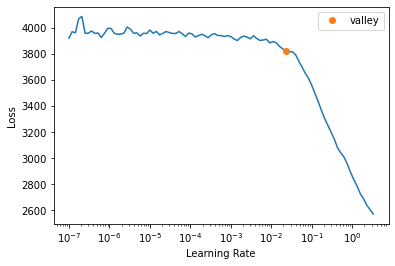

In [107]:
lr_value=learn.lr_find()
lr_value

In [108]:
learn.fit_one_cycle(250,lr_value)

epoch,train_loss,valid_loss,_rmse,time
0,3930.063477,3309.979248,57.532417,00:00
1,3901.867188,3308.419189,57.518860,00:00
2,3881.853271,3303.841064,57.479050,00:00
3,3865.449951,3293.010986,57.384762,00:00
4,3855.573486,3272.717529,57.207668,00:00
5,3841.942627,3238.437256,56.907269,00:00
6,3829.164062,3191.873779,56.496670,00:00
7,3817.353271,3140.994141,56.044571,00:00
8,3805.561279,3087.249268,55.563019,00:00
9,3793.701660,3045.748291,55.188297,00:00


In [109]:
learn.show_results()

,BATTERY_ID,EIS_ID,Z_f0_phi,Z_f0_abs,Z_f1_phi,Z_f1_abs,Z_f2_phi,Z_f2_abs,Z_f3_phi,Z_f3_abs,Z_f4_phi,Z_f4_abs,Z_f5_phi,Z_f5_abs,Z_f6_phi,Z_f6_abs,Z_f7_phi,Z_f7_abs,Z_f8_phi,Z_f8_abs,Z_f9_phi,Z_f9_abs,Z_f10_phi,Z_f10_abs,Z_f11_phi,Z_f11_abs,Z_f12_phi,Z_f12_abs,Z_f13_phi,Z_f13_abs,SOC_float,SOC_float_pred
0,1.0,1.0,3.018617,-0.827513,2.945765,-0.806044,2.944925,-1.555734,2.937569,-1.957281,2.908188,-2.450140,2.861195,-2.566676,2.735432,-2.690797,2.455366,-2.918424,2.121527,-2.594390,2.021933,-1.746232,1.763960,-1.118202,1.403163,-1.165685,1.281585,-0.577097,1.153073,-0.318583,10.0,11.923117
1,1.0,4.0,-0.563625,1.295823,-0.482145,1.017324,-0.403120,1.162824,-0.342816,0.839340,-0.238835,0.775321,-0.156093,0.462220,-0.049893,0.472778,-0.052733,0.025935,-0.021208,-0.050278,-0.107114,0.055003,-0.212229,-0.229501,-0.223361,-0.326548,-0.324855,-0.102625,-0.237877,-0.074095,30.0,31.598015
2,2.0,9.0,-0.452460,-0.711362,-0.661364,-1.312241,-0.825049,-0.792847,-0.802021,-0.079742,-0.870067,0.234762,-0.911558,0.542186,-0.938249,0.732572,-0.911333,1.075985,-0.714069,1.275259,-0.485628,1.410534,-0.187669,1.087087,-0.014417,1.328417,0.172726,0.686816,0.218684,1.144348,60.0,59.977173
3,1.0,4.0,-0.177676,-0.743969,-0.404101,-1.811505,-0.608806,-0.756325,-0.617121,-0.685362,-0.732219,-0.200795,-0.786084,0.054490,-0.919607,0.371288,-0.935637,0.588456,-1.032778,0.626630,-0.938570,0.362668,-1.078424,0.247974,-0.997305,-0.173439,-0.923826,0.412226,-0.928513,-0.204585,60.0,59.821564
4,1.0,3.0,0.557462,-1.346604,0.436932,-1.325054,0.363218,-1.149311,0.295051,-0.825828,0.252051,-0.200956,0.255753,-0.103285,0.295020,-0.102248,0.479799,0.132194,0.657161,-0.130154,0.650460,-0.263897,0.632362,-0.654020,0.371260,-0.236380,0.312313,-0.425947,0.159649,0.185894,80.0,78.567772
5,1.0,2.0,0.152040,-1.490129,0.050809,-0.932527,-0.015621,-1.289447,-0.085486,-0.762304,-0.162270,-0.201231,-0.218084,-0.149955,-0.087837,0.037273,-0.063585,-0.089180,-0.194287,-0.366681,-0.362769,-0.670478,-0.693558,-0.999692,-0.872788,-1.233402,-0.940718,-1.200104,-0.961494,-1.039261,80.0,76.908424
6,1.0,2.0,-0.144984,1.035970,-0.070940,1.185703,0.042421,1.160761,0.128566,1.049395,0.218566,0.731460,0.343544,0.486326,0.311471,0.216342,0.453987,-0.126589,0.594849,-0.615068,0.543125,-0.852681,0.253802,-0.816076,0.137162,-0.563407,0.056893,-0.309053,0.080201,0.115796,30.0,34.941143
7,1.0,6.0,-0.823987,1.418182,-0.712985,1.210377,-0.628993,1.228797,-0.550680,1.185857,-0.491113,0.718687,-0.513880,0.642421,-0.499862,0.471460,-0.546366,0.141254,-0.524561,0.183729,-0.728563,0.224750,-0.547942,0.403555,-0.384946,0.274964,-0.374699,0.519197,-0.280019,0.661285,30.0,28.952021
8,2.0,7.0,-0.816099,1.297134,-0.687817,1.430979,-0.611429,1.503335,-0.548725,1.273187,-0.446660,0.991211,-0.420017,0.858410,-0.319067,0.739829,-0.087955,0.756471,-0.012579,0.501329,0.095358,0.087437,0.024852,0.116457,0.049180,-0.050498,-0.033043,0.146084,0.043898,-0.352091,40.0,39.914528


In [110]:
from sklearn.metrics import mean_squared_error
[y_pred,y_true] =learn.get_preds()
mean_squared_error(y_true,y_pred,squared=False)


2.830733

In [111]:
learn.save('EIS_tabular_regression')

Path('../models/models/EIS_tabular_regression.pth')

# Tabular Learner Regression - Rectangular

In [112]:
from cmath import phase, polar, rect
df=dataset[feature_col_names]
df_real= df.apply(lambda col: col.apply(lambda val: np.real(val)))
df_imag= df.apply(lambda col: col.apply(lambda val: np.imag(val)))

In [113]:
rect_feature_names= list()
for feat_name in feature_col_names:
    rect_feature_names.append(feat_name+"_real")
    rect_feature_names.append(feat_name+"_imag")

In [114]:
df_commn=dataset[['SOC_float','BATTERY_ID','EIS_ID']]
dataset_rect= df_real.join(df_imag,lsuffix='_real' , rsuffix="_imag")
dataset_rect= df_commn.join(dataset_rect)
print(dataset_rect)

     SOC_float BATTERY_ID EIS_ID  Z_f0_real  Z_f1_real  Z_f2_real  Z_f3_real  \
0        100.0         02   02_4   0.110974   0.109770   0.108937   0.108215   
1         90.0         02   02_4   0.107767   0.105732   0.104519   0.103729   
2         80.0         02   02_4   0.107165   0.105013   0.103722   0.102852   
3         70.0         02   02_4   0.106559   0.104313   0.102949   0.102107   
4         60.0         02   02_4   0.106086   0.103528   0.101676   0.101073   
..         ...        ...    ...        ...        ...        ...        ...   
115       50.0         03   03_9   0.100378   0.099021   0.098186   0.097668   
116       40.0         03   03_9   0.102126   0.101105   0.100182   0.100085   
117       30.0         03   03_9   0.103930   0.102584   0.101950   0.101735   
118       20.0         03   03_9   0.107854   0.106414   0.105235   0.104801   
119       10.0         03   03_9   0.117656   0.115695   0.113917   0.112869   

     Z_f4_real  Z_f5_real  Z_f6_real  .

In [115]:
# Regression with Tabular Learner - Polar 
to = TabularPandas(dataset_rect, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = rect_feature_names,
                   y_names='SOC_float',
                   splits=splits)
dls = to.dataloaders(bs=32)
dls.show_batch()
learn = tabular_learner(dls, layers=[300,200, 100, 50],metrics= rmse)



,BATTERY_ID,EIS_ID,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float
0,02,02_7,0.115191,-0.006117,0.113023,-0.005105,0.111410,-0.004137,0.110347,-0.003848,0.108054,-0.004646,0.106049,-0.005741,0.103264,-0.006629,0.098760,-0.007167,0.095332,-0.006936,0.092181,-0.006619,0.088247,-0.006252,0.085419,-0.005768,0.083137,-0.004890,0.080348,-0.003704,10.0
1,02,02_5,0.117446,-0.006380,0.115321,-0.005276,0.113859,-0.004217,0.112702,-0.003964,0.110350,-0.004655,0.108393,-0.005851,0.105797,-0.006911,0.101024,-0.007336,0.097323,-0.007469,0.093959,-0.007182,0.089804,-0.006685,0.086737,-0.005920,0.084208,-0.005161,0.081587,-0.003715,10.0
2,03,03_8,0.104179,-0.005474,0.101813,-0.004984,0.100139,-0.003198,0.099633,-0.002223,0.098487,-0.002084,0.097921,-0.002213,0.097039,-0.002480,0.095502,-0.003416,0.093727,-0.004354,0.091411,-0.004915,0.088114,-0.004990,0.085885,-0.004798,0.083686,-0.004266,0.081253,-0.003227,60.0
3,03,03_6,0.103815,-0.005853,0.101978,-0.004575,0.100506,-0.003185,0.099878,-0.002426,0.098775,-0.002192,0.098104,-0.002371,0.097112,-0.002836,0.095440,-0.003921,0.093466,-0.004848,0.090979,-0.005450,0.087305,-0.005524,0.084722,-0.005227,0.082474,-0.004554,0.080044,-0.003441,80.0
4,02,02_4,0.110974,-0.005473,0.109770,-0.003682,0.108937,-0.002976,0.108215,-0.002449,0.106929,-0.002464,0.106234,-0.003175,0.105358,-0.003646,0.102248,-0.006236,0.098367,-0.007857,0.094470,-0.008309,0.089097,-0.007805,0.085451,-0.006982,0.082563,-0.005838,0.079681,-0.004045,100.0
5,03,03_5,0.112756,-0.006047,0.110779,-0.004718,0.109273,-0.003865,0.108393,-0.003634,0.106254,-0.004460,0.104250,-0.005318,0.101555,-0.006012,0.097567,-0.006326,0.094610,-0.006117,0.091945,-0.006026,0.088409,-0.005748,0.085686,-0.005319,0.083355,-0.004779,0.080770,-0.003574,10.0
6,02,02_6,0.107315,-0.005817,0.104517,-0.005469,0.102643,-0.003531,0.102312,-0.002658,0.100823,-0.002386,0.100026,-0.002568,0.099073,-0.002818,0.097359,-0.004168,0.094944,-0.005326,0.092343,-0.005771,0.088405,-0.006092,0.085590,-0.005548,0.083079,-0.004668,0.080478,-0.003491,60.0
7,02,02_6,0.104789,-0.004252,0.103405,-0.003394,0.102442,-0.002272,0.102128,-0.001819,0.101092,-0.001870,0.100629,-0.002320,0.099570,-0.002509,0.098000,-0.004306,0.095601,-0.005300,0.092792,-0.006126,0.088662,-0.006107,0.085855,-0.005678,0.083157,-0.004765,0.080692,-0.003579,50.0
8,02,02_8,0.104399,-0.004126,0.102932,-0.003483,0.101848,-0.002430,0.101381,-0.002037,0.100403,-0.002216,0.099673,-0.002853,0.098252,-0.003712,0.095561,-0.005099,0.092999,-0.005667,0.089950,-0.005989,0.086230,-0.005657,0.083631,-0.005394,0.081275,-0.004623,0.078640,-0.003659,20.0
9,03,03_8,0.104177,-0.003695,0.102837,-0.002891,0.101919,-0.001959,0.101757,-0.001515,0.101140,-0.001550,0.100642,-0.002046,0.099626,-0.002646,0.097736,-0.004096,0.095664,-0.004870,0.093115,-0.005231,0.089748,-0.005280,0.087216,-0.004942,0.085042,-0.004395,0.082572,-0.003360,30.0


In [116]:
dls = to.dataloaders(bs=32)
dls.show_batch()

,BATTERY_ID,EIS_ID,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float
0,03,03_6,0.105595,-0.005202,0.104546,-0.003422,0.103787,-0.002494,0.103271,-0.001926,0.102475,-0.002036,0.101759,-0.002493,0.100942,-0.003006,0.098506,-0.004813,0.095905,-0.005917,0.092838,-0.006218,0.088706,-0.006272,0.085711,-0.005892,0.083163,-0.005077,0.080516,-0.003842,100.0
1,02,02_5,0.117446,-0.006380,0.115321,-0.005276,0.113859,-0.004217,0.112702,-0.003964,0.110350,-0.004655,0.108393,-0.005851,0.105797,-0.006911,0.101024,-0.007336,0.097323,-0.007469,0.093959,-0.007182,0.089804,-0.006685,0.086737,-0.005920,0.084208,-0.005161,0.081587,-0.003715,10.0
2,03,03_4,0.106557,-0.004217,0.105137,-0.003422,0.104078,-0.002225,0.103778,-0.001872,0.102811,-0.002025,0.101985,-0.002713,0.100808,-0.003593,0.098259,-0.005106,0.095418,-0.005791,0.092568,-0.006084,0.088697,-0.005919,0.085857,-0.005447,0.083573,-0.004666,0.080988,-0.003513,20.0
3,03,03_6,0.100862,-0.004017,0.099501,-0.003075,0.098879,-0.002068,0.098403,-0.001464,0.097579,-0.001458,0.097275,-0.001717,0.096373,-0.002189,0.095230,-0.003465,0.093255,-0.004334,0.090978,-0.004964,0.087608,-0.005170,0.085168,-0.004897,0.082983,-0.004386,0.080522,-0.003313,50.0
4,02,02_8,0.101748,-0.003766,0.100556,-0.002882,0.099869,-0.002086,0.099480,-0.001559,0.098704,-0.001795,0.097998,-0.002245,0.097268,-0.002948,0.095212,-0.004317,0.092550,-0.005568,0.089636,-0.005937,0.085984,-0.005691,0.083158,-0.005368,0.080909,-0.004639,0.078132,-0.003530,30.0
5,02,02_4,0.103768,-0.004256,0.102449,-0.003355,0.101666,-0.002424,0.101108,-0.001858,0.099993,-0.001833,0.099596,-0.002300,0.099106,-0.002856,0.096909,-0.004247,0.094556,-0.005593,0.091448,-0.006259,0.087291,-0.006430,0.084213,-0.005777,0.081852,-0.004830,0.079187,-0.003503,50.0
6,02,02_5,0.109336,-0.004428,0.107732,-0.003543,0.106617,-0.002638,0.106304,-0.002029,0.104990,-0.002547,0.104203,-0.003232,0.103303,-0.003933,0.099861,-0.005897,0.096595,-0.006744,0.093190,-0.007009,0.089090,-0.006583,0.085913,-0.005901,0.083362,-0.004946,0.080681,-0.003676,20.0
7,03,03_8,0.104416,-0.005928,0.102415,-0.004648,0.101054,-0.003228,0.100439,-0.002509,0.099252,-0.002237,0.098470,-0.002468,0.097735,-0.002741,0.095940,-0.003939,0.093914,-0.004823,0.091400,-0.005192,0.087955,-0.005301,0.085350,-0.005046,0.083119,-0.004432,0.080732,-0.003353,80.0
8,02,02_6,0.104429,-0.003778,0.103299,-0.003013,0.102661,-0.002087,0.102251,-0.001534,0.101498,-0.001566,0.101008,-0.002127,0.100317,-0.002878,0.098298,-0.004203,0.095991,-0.005383,0.093108,-0.005984,0.089136,-0.006188,0.086168,-0.005637,0.083746,-0.004917,0.081061,-0.003537,40.0
9,03,03_7,0.107358,-0.004212,0.105895,-0.003426,0.105025,-0.002439,0.104451,-0.001905,0.103449,-0.002129,0.102641,-0.002820,0.101586,-0.003759,0.098724,-0.004936,0.096105,-0.005357,0.093552,-0.005430,0.090093,-0.005500,0.087673,-0.005103,0.085427,-0.004426,0.082937,-0.003372,20.0


In [117]:
learn = tabular_learner(dls, layers=[300,200, 100, 50],metrics= rmse,path=path)

SuggestedLRs(valley=0.033113110810518265)

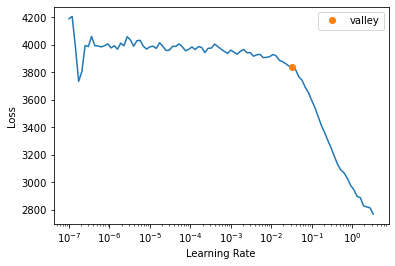

In [118]:
lr_value=learn.lr_find()
lr_value

In [119]:
learn.fit_one_cycle(250,0.045)



epoch,train_loss,valid_loss,_rmse,time
0,3944.432373,3318.563232,57.606972,00:00
1,3905.591553,3309.074219,57.524551,00:00
2,3890.897461,3291.288330,57.369751,00:00
3,3872.397217,3267.846924,57.165085,00:00
4,3853.016113,3230.100830,56.833977,00:00
5,3833.360596,3181.592529,56.405609,00:00
6,3813.820312,3134.166992,55.983631,00:00
7,3794.826172,3108.044189,55.749836,00:00
8,3774.542236,3081.599365,55.512154,00:00
9,3753.096191,3044.606201,55.177952,00:00


In [120]:
learn.show_results()

,BATTERY_ID,EIS_ID,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float,SOC_float_pred
0,2.0,9.0,-0.279547,1.258647,-0.119801,0.882723,-0.116778,0.749207,-0.085308,0.949849,0.000685,0.245585,0.049465,0.078405,0.002992,0.068533,-0.038052,0.050950,0.083740,0.650099,0.148105,0.860574,0.570870,1.043425,0.898118,1.269392,1.007637,1.180589,1.019174,0.612426,20.0,22.538843
1,1.0,5.0,1.854875,-1.049866,1.754531,-1.122697,1.726429,-1.909183,1.655076,-2.215815,1.500638,-2.448040,1.316098,-2.664357,0.846571,-2.734423,0.002019,-2.316616,-0.374002,-1.411785,-0.439802,-0.618293,-0.495431,0.085568,-0.286932,-0.193975,-0.450299,0.053608,-0.333173,-0.646859,10.0,11.887159
2,1.0,4.0,-0.552671,1.299030,-0.474696,1.048095,-0.398893,1.126867,-0.340532,0.800607,-0.235595,0.723557,-0.152127,0.444749,-0.042073,0.452395,-0.050731,0.042821,-0.020836,-0.032616,-0.104893,0.070853,-0.217478,-0.193224,-0.228783,-0.293988,-0.324156,-0.038097,-0.237574,-0.011649,30.0,35.983562
3,2.0,8.0,-0.178060,0.820702,-0.110814,0.671321,-0.086103,0.781250,-0.016817,0.461465,0.022850,0.208315,0.036835,0.044016,0.015261,-0.231117,-0.135167,-0.428989,-0.267256,-0.092746,-0.310812,0.448848,-0.077771,0.392665,0.079790,0.803794,0.110902,0.352212,0.174197,0.514171,20.0,20.680222
4,1.0,5.0,-0.642291,-0.581921,-0.773213,-0.428884,-0.824869,-0.334953,-0.881735,-0.426398,-0.947276,0.028029,-1.068863,0.172167,-1.236117,0.189708,-1.470533,0.342824,-1.705976,0.046514,-1.904922,0.072727,-2.067167,-0.156540,-2.010974,-0.379439,-2.110982,-0.321078,-2.131310,0.421051,90.0,83.180534
5,2.0,10.0,-0.215821,-0.476728,-0.238446,-0.398517,-0.211967,-0.163689,-0.276349,-0.178096,-0.276341,0.129411,-0.293205,0.274258,-0.345644,0.464320,-0.180279,0.673015,-0.026864,0.466073,0.103459,0.491125,0.137031,0.557448,0.220263,0.661975,0.289400,0.488088,0.308627,0.480390,90.0,86.803284
6,1.0,3.0,0.544264,-1.374461,0.426020,-1.359064,0.358624,-1.111704,0.293096,-0.761958,0.253456,-0.179301,0.259079,-0.092063,0.299984,-0.098735,0.493113,0.088329,0.668301,-0.186240,0.652787,-0.326552,0.613691,-0.747441,0.364917,-0.315725,0.304705,-0.532618,0.160566,0.143882,80.0,75.038925
7,1.0,2.0,-0.134697,0.993581,-0.061725,1.151366,0.047614,1.073663,0.132744,0.945489,0.224286,0.654648,0.352533,0.433639,0.320963,0.192991,0.461371,-0.147554,0.591039,-0.623607,0.524550,-0.865702,0.230251,-0.846006,0.124363,-0.605512,0.052447,-0.346969,0.080883,0.092680,30.0,35.851971
8,1.0,2.0,0.119979,-1.468065,-0.015495,-1.299336,-0.079987,-1.174801,-0.224955,-0.673641,-0.298873,-0.191235,-0.268947,-0.251651,-0.344922,0.380286,-0.326845,0.088536,-0.329530,0.112129,-0.479648,-0.484980,-0.629140,-0.706132,-0.791686,-0.536225,-0.820381,-0.233424,-0.738168,0.442964,70.0,65.159431


In [121]:
from sklearn.metrics import mean_squared_error
[y_pred,y_true] =learn.get_preds()
mean_squared_error(y_true,y_pred,squared=False)

3.7538447

In [122]:
learn.save('EIS_tabular_regression_rect')

Path('../models/models/EIS_tabular_regression_rect.pth')

In [123]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(13, 7)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=38, out_features=300, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=300, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): LinBnDrop(
      (0): Linear(in_features=100, out_features=50, bias=False)
      (1): ReLU(inplace=

In [124]:
learn.summary()

TabularModel (Input shape: 32 x 2)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 3              
Embedding                                 9          True      
____________________________________________________________________________
                     32 x 7              
Embedding                                 91         True      
Dropout                                                        
BatchNorm1d                               56         True      
____________________________________________________________________________
                     32 x 300            
Linear                                    11400      True      
ReLU                                                           
BatchNorm1d                               600        True      
____________________________________________________________________________
                     32 x 200            
Linear                                    60000      T